***Clean-Up of the trigger event variables***

In [1]:
import pandas as pd
import numpy as np
import os
import json
import requests
import matplotlib as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pycountry

start with the UCDP data

**1. UCDP**

In [2]:
#set in the params, what i want to get, but dont i need to flatten the data first?
#import requests, math
#url="https://ucdpapi.pcr.uu.se/api/gedevents/23.1?pagesize=100"
#datasets_per_request=100
#data_count =316818

#print("Data to be Downloaded: ", data_count)


# Start with an empty list
#total_results = []
# do paging correctly
# using limit and offset system query option
#request_count = math.ceil(data_count / datasets_per_request)
#print("Numbers of requests: ", request_count)

#for i in range(0, request_count):
 #   request_params = {
  #      "limit": datasets_per_request,
   #     "offset": i* datasets_per_request
    #}
 # trying to do the Requests 10 times:
    #for i in range(10):
     #   try : # catch connection Error if it appears
      #      response = requests.get(url, params=request_params)
       #     print(response.status_code)
        #    print(response.headers)
         #   break # exit for loop when successfull
        #except requests.ConnectionError:
         #   print("Request failed. trying again")
          #  continue

    #print('got data from: ', response.url)
    #data = response.json()#['results']

    #total_results.append(data)

#print("We have", len(total_results), "total results")

In [3]:
#total_results

In [4]:
#parse into a dataframe
#data = pd.DataFrame(total_results['Result'])
#print(data)

In [5]:
#load data from the csv created
data = pd.read_csv("GEDEvent_v23_1.csv")

C:\Users\cecilianatalie.strom\AppData\Local\Temp\ipykernel_13744\3270395232.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("GEDEvent_v23_1.csv")


In [6]:
# receiving the fist x rows of the dataframe
display(data.head())
#receiving the first 2 rows of the dataframe
display(data.head(2))
#get the name of all columns
print(data.columns)

#check for missingness
is_null = data.isnull().sum()
display(is_null)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN


Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')


id                        0
relid                     0
year                      0
active_year               0
code_status               0
type_of_violence          0
conflict_dset_id          0
conflict_new_id           0
conflict_name             0
dyad_dset_id              0
dyad_new_id               0
dyad_name                 0
side_a_dset_id            0
side_a_new_id             0
side_a                    0
side_b_dset_id            0
side_b_new_id             0
side_b                    0
number_of_sources         0
source_article            0
source_office        100061
source_date          100061
source_headline      100067
source_original       41293
where_prec                0
where_coordinates         0
where_description      6767
adm_1                 17839
adm_2                 66665
latitude                  0
longitude                 0
geom_wkt                  0
priogrid_gid              0
country                   0
country_id                0
region              

In [7]:
#filtering data can be done through the filter function
data_ucdp= data.filter(['id', 'relid', 'year', 'type_of_violence', 'country', 'country_id','date_start', 'date_end', 'best','gwnoa', 'gwnob'])
display(data_ucdp)
#rename & select columns
data_ucdp = data_ucdp.rename(columns= {'best':'fatality_best_estimate'})


,id,relid,year,type_of_violence,country,country_id,date_start,date_end,best,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Afghanistan,700,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Afghanistan,700,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,183,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Afghanistan,700,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,2,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Afghanistan,700,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,10,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Afghanistan,700,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,700,NaN
...,...,...,...,...,...,...,...,...,...,...,...
316813,15525,MZM-1989-3-1347-4,1989,3,Zimbabwe (Rhodesia),552,1989-03-18 00:00:00.000,1989-03-24 00:00:00.000,9,NaN,NaN
316814,15524,MZM-1989-3-1347-16,1989,3,Zimbabwe (Rhodesia),552,1989-07-09 00:00:00.000,1989-07-15 00:00:00.000,9,NaN,NaN
316815,15245,MZM-1990-3-1347-18,1990,3,Zimbabwe (Rhodesia),552,1990-06-07 00:00:00.000,1990-06-10 00:00:00.000,7,NaN,NaN
316816,15516,MZM-1990-3-1347-28,1990,3,Zimbabwe (Rhodesia),552,1990-11-17 00:00:00.000,1990-11-23 00:00:00.000,1,NaN,NaN


In [8]:
#match te start and end dates to find differences
data_ucdp['date_start'].equals(data_ucdp['date_end'])

False

In [9]:
data_ucdp['check'] = data_ucdp['date_start'].isin(data_ucdp['date_end'])
data_ucdp.check

0         True
1         True
2         True
3         True
4         True
          ... 
316813    True
316814    True
316815    True
316816    True
316817    True
Name: check, Length: 316818, dtype: bool

In [10]:
test = data_ucdp[data_ucdp['check'] == False]
test
#the check has given us the indication, that the start and end date of the events 
#are mostly the same day, so we can use one column as event column

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
79514,23960,DRC-1997-1-39-24,1997,1,DR Congo (Zaire),490,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,4,490.0,NaN,False
202588,36696,UGA-1997-1-151-4.1,1997,1,Sudan,625,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,75,500.0,NaN,False
202589,36704,UGA-1997-1-151-4.2,1997,1,Sudan,625,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,75,500.0,NaN,False


In [11]:
test

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
79514,23960,DRC-1997-1-39-24,1997,1,DR Congo (Zaire),490,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,4,490.0,NaN,False
202588,36696,UGA-1997-1-151-4.1,1997,1,Sudan,625,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,75,500.0,NaN,False
202589,36704,UGA-1997-1-151-4.2,1997,1,Sudan,625,1997-04-09 00:00:00.000,1997-04-10 00:00:00.000,75,500.0,NaN,False


In [12]:
#filter years to only contain 2020 - 2023
data_ucdp = data_ucdp[data_ucdp['year'] > 2019]
#create an event column based on the start and end date 
data_ucdp['conflict_event'] = data_ucdp['date_start'].copy()
data_ucdp = data_ucdp.drop(columns=['date_start','check','date_end'])

In [13]:
data_ucdp['year'].unique()

array([2021, 2020, 2022], dtype=int64)

In [14]:
#pip install pycountry

In [15]:
#add iso3 codes
##mport the function
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_ucdp['iso'] = data_ucdp.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_ucdp[data_ucdp['iso'].isna()]
print(inspect['iso'].unique())

list_iso = list(data_ucdp.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

[]


['AFG',
 'DZA',
 'AGO',
 'ARM',
 'AUT',
 'AZE',
 'BGD',
 'BEN',
 '',
 'BRA',
 'BFA',
 'BDI',
 'CMR',
 'CAF',
 'TCD',
 'COL',
 'COG',
 'DJI',
 'ECU',
 'EGY',
 'SLV',
 'ERI',
 'ETH',
 'GHA',
 'GTM',
 'GIN',
 'HTI',
 'HND',
 'IND',
 'IDN',
 'IRQ',
 'ISR',
 'KEN',
 'KGZ',
 'LBN',
 'LBR',
 'LBY',
 'MLI',
 'MRT',
 'MEX',
 'MAR',
 'MOZ',
 'NPL',
 'NER',
 'NGA',
 'PAK',
 'PNG',
 'PRY',
 'PER',
 'PHL',
 'POL',
 'RWA',
 'SAU',
 'SEN',
 'SLE',
 'SOM',
 'ZAF',
 'SSD',
 'SDN',
 'TJK',
 'THA',
 'TGO',
 'TUN',
 'UGA',
 'UKR',
 'ARE']

In [16]:
inspect

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso


In [17]:
#inspect the iso codes and ensure their correctness
iso = data_ucdp = data_ucdp[data_ucdp['iso'] == '']
iso

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
49662,450724,BRA-2021-2-15142-278,2021,2,Bolivia,145,1,NaN,NaN,2021-04-22 00:00:00.000,
79800,348985,UGA-2020-1-688-0,2020,1,DR Congo (Zaire),490,2,500.0,NaN,2020-07-23 00:00:00.000,
80006,425460,UGA-2021-1-689-0,2021,1,DR Congo (Zaire),490,2,500.0,NaN,2021-12-20 00:00:00.000,
80051,336347,DRC-2020-1-894-0,2020,1,DR Congo (Zaire),490,3,490.0,NaN,2020-03-30 00:00:00.000,
80052,339064,DRC-2020-1-894-1,2020,1,DR Congo (Zaire),490,4,490.0,NaN,2020-04-13 00:00:00.000,
...,...,...,...,...,...,...,...,...,...,...,...
316708,444863,YEM-2022-2-17346-1,2022,2,Yemen (North Yemen),678,5,NaN,NaN,2022-08-09 00:00:00.000,
316709,447069,YEM-2022-2-17346-3,2022,2,Yemen (North Yemen),678,29,NaN,NaN,2022-08-09 00:00:00.000,
316710,444865,YEM-2022-2-17346-4,2022,2,Yemen (North Yemen),678,1,NaN,NaN,2022-08-10 00:00:00.000,
316711,447228,YEM-2022-2-17346-5,2022,2,Yemen (North Yemen),678,1,NaN,NaN,2022-08-15 00:00:00.000,


In [18]:
iso.country.unique()

array(['Bolivia', 'DR Congo (Zaire)', 'Iran', 'Ivory Coast',
       'Kingdom of eSwatini (Swaziland)', 'Madagascar (Malagasy)',
       'Myanmar (Burma)', 'Russia (Soviet Union)', 'Syria', 'Tanzania',
       'Turkey', 'United States of America', 'Venezuela',
       'Yemen (North Yemen)', 'Zimbabwe (Rhodesia)'], dtype=object)

In [19]:
#add the iso codes for the countriesthat were missed
data_ucdp.loc[data_ucdp['country'] == "Cote d'Ivoire", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == "Ivory Coast", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == 'Bolivia','iso']= 'BOL'
data_ucdp.loc[data_ucdp['country'] == 'DR Congo (Zaire)','iso']= 'COD'
data_ucdp.loc[data_ucdp['country'] == 'Iran','iso']= 'IRN'
data_ucdp.loc[data_ucdp['country'] == 'Kingdom of eSwatini (Swaziland)','iso']='SWZ'
data_ucdp.loc[data_ucdp['country'] == 'Madagascar (Malagasy)','iso']= 'MDG'
data_ucdp.loc[data_ucdp['country'] == 'Myanmar (Burma)','iso']= 'MMR'
data_ucdp.loc[data_ucdp['country'] == 'Russia (Soviet Union)','iso']= 'RUS'
data_ucdp.loc[data_ucdp['country'] == 'Syria','iso']='SYR'
data_ucdp.loc[data_ucdp['country'] == 'Tanzania','iso']= 'TZA'
data_ucdp.loc[data_ucdp['country'] == 'Turkey','iso']='TUR'
data_ucdp.loc[data_ucdp['country'] == 'United States of America','iso']= 'USA'
data_ucdp.loc[data_ucdp['country'] == 'Venezuela','iso']= 'VEN'
data_ucdp.loc[data_ucdp['country'] == 'Yemen (North Yemen)','iso']='YEM'
data_ucdp.loc[data_ucdp['country'] == 'Zimbabwe (Rhodesia)','iso']= 'ZWE'

In [20]:
data_ucdp

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
49662,450724,BRA-2021-2-15142-278,2021,2,Bolivia,145,1,NaN,NaN,2021-04-22 00:00:00.000,BOL
79800,348985,UGA-2020-1-688-0,2020,1,DR Congo (Zaire),490,2,500.0,NaN,2020-07-23 00:00:00.000,COD
80006,425460,UGA-2021-1-689-0,2021,1,DR Congo (Zaire),490,2,500.0,NaN,2021-12-20 00:00:00.000,COD
80051,336347,DRC-2020-1-894-0,2020,1,DR Congo (Zaire),490,3,490.0,NaN,2020-03-30 00:00:00.000,COD
80052,339064,DRC-2020-1-894-1,2020,1,DR Congo (Zaire),490,4,490.0,NaN,2020-04-13 00:00:00.000,COD
...,...,...,...,...,...,...,...,...,...,...,...
316708,444863,YEM-2022-2-17346-1,2022,2,Yemen (North Yemen),678,5,NaN,NaN,2022-08-09 00:00:00.000,YEM
316709,447069,YEM-2022-2-17346-3,2022,2,Yemen (North Yemen),678,29,NaN,NaN,2022-08-09 00:00:00.000,YEM
316710,444865,YEM-2022-2-17346-4,2022,2,Yemen (North Yemen),678,1,NaN,NaN,2022-08-10 00:00:00.000,YEM
316711,447228,YEM-2022-2-17346-5,2022,2,Yemen (North Yemen),678,1,NaN,NaN,2022-08-15 00:00:00.000,YEM


In [21]:
data_ucdp.type_of_violence.unique()

array([2, 1, 3], dtype=int64)

In [22]:
#filter for type 3 violence as os violence
data_os = data_ucdp[data_ucdp['type_of_violence'] == 3]
display(data_os)

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
80776,347337,DRC-2020-3-934-47,2020,3,DR Congo (Zaire),490,1,490.0,NaN,2020-01-12 00:00:00.000,COD
80777,325408,DRC-2020-3-934-0,2020,3,DR Congo (Zaire),490,2,490.0,NaN,2020-01-20 00:00:00.000,COD
80778,332713,DRC-2020-3-934-3,2020,3,DR Congo (Zaire),490,1,490.0,NaN,2020-02-01 00:00:00.000,COD
80779,332700,DRC-2020-3-934-2,2020,3,DR Congo (Zaire),490,1,490.0,NaN,2020-02-10 00:00:00.000,COD
80780,332749,DRC-2020-3-934-4,2020,3,DR Congo (Zaire),490,1,490.0,NaN,2020-02-14 00:00:00.000,COD
...,...,...,...,...,...,...,...,...,...,...,...
313140,447349,YEM-2022-3-1182-7,2022,3,Yemen (North Yemen),678,0,678.0,NaN,2022-08-18 00:00:00.000,YEM
313141,452109,YEM-2022-3-1182-8,2022,3,Yemen (North Yemen),678,1,678.0,NaN,2022-10-11 00:00:00.000,YEM
313142,456682,YEM-2022-3-1182-10,2022,3,Yemen (North Yemen),678,1,678.0,NaN,2022-10-17 00:00:00.000,YEM
313143,460264,YEM-2022-3-1182-11,2022,3,Yemen (North Yemen),678,2,678.0,NaN,2022-12-06 00:00:00.000,YEM


In [23]:
#safe as new dfs
data_os.to_csv("ucdp_os.csv")
data_ucdp.to_csv("ucdp_cleaned.csv")

In [24]:
#group by the country_id and country
data_ucdp=data_ucdp.groupby(['year','iso']).sum().reset_index()
display(data_ucdp)

,year,iso,id,relid,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event
0,2020,CIV,366882,CDI-2020-3-924-0,3,Ivory Coast,437,3,437,0.0,2020-11-09 00:00:00.000
1,2020,COD,292520578,UGA-2020-1-688-0DRC-2020-1-894-0DRC-2020-1-894...,1888,DR Congo (Zaire)DR Congo (Zaire)DR Congo (Zair...,404740,3984,153987.0,0.0,2020-07-23 00:00:00.0002020-03-30 00:00:00.000...
2,2020,IRN,9582072,IRN-2020-1-406-1IRN-2020-1-406-3IRN-2020-1-754...,40,IranIranIranIranIranIranIranIranIranIranIranIr...,16380,246,15752.0,1332.0,2020-05-06 00:00:00.0002020-07-07 00:00:00.000...
3,2020,MDG,371793,MAG-2020-3-945-0,3,Madagascar (Malagasy),580,23,580,0.0,2020-08-23 00:00:00.000
4,2020,MMR,24955580,MYA-2020-1-428-0MYA-2020-1-428-1MYA-2020-1-428...,81,Myanmar (Burma)Myanmar (Burma)Myanmar (Burma)M...,55025,196,55025.0,0.0,2020-01-02 00:00:00.0002020-01-27 00:00:00.000...
5,2020,RUS,6361952,RUS-2020-3-920-0SYR-2020-1-11973-614RUS-2020-1...,20,Russia (Soviet Union)Russia (Soviet Union)Russ...,6570,33,6857.0,0.0,2020-05-31 00:00:00.0002020-10-15 00:00:00.000...
6,2020,SWZ,705696,SWA-2020-3-2485-0SWA-2020-3-2485-1,6,Kingdom of eSwatini (Swaziland)Kingdom of eSwa...,1144,2,572572,0.0,2020-01-01 00:00:00.0002020-08-04 00:00:00.000
7,2020,SYR,393546326,ISR-2020-1-478-2IRQ-2020-1-524-52IRQ-2020-1-52...,1543,SyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaS...,743280,5690,525364.0,24642.0,2020-02-23 00:00:00.0002020-05-21 00:00:00.000...
8,2020,TUR,37678089,TUR-2020-1-781-38TUR-2020-1-781-61TUR-2020-1-7...,112,TurkeyTurkeyTurkeyTurkeyTurkeyTurkeyTurkeyTurk...,67840,206,65920.0,0.0,2020-02-01 00:00:00.0002020-02-08 00:00:00.000...
9,2020,TZA,6808713,TAZ-2020-3-937-15TAZ-2020-3-937-6TAZ-2020-3-93...,47,TanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzan...,8670,44,8670.0,0.0,2020-01-01 00:00:00.0002020-10-24 00:00:00.000...


In [25]:
#get descriptives and plot the data
print(data_ucdp.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

              year            id  type_of_violence    country_id  \
count    35.000000  3.500000e+01         35.000000  3.500000e+01   
mean   2020.942857  1.202886e+08        480.114286  1.881953e+05   
std       0.838165  1.823024e+08        768.241987  2.930133e+05   
min    2020.000000  3.667570e+05          2.000000  2.000000e+00   
25%    2020.000000  1.282769e+06          7.500000  1.144000e+03   
50%    2021.000000  1.255694e+07         47.000000  1.638000e+04   
75%    2022.000000  2.697083e+08        776.500000  4.000850e+05   
max    2022.000000  6.847611e+08       2866.000000  1.191175e+06   

       fatality_best_estimate         gwnob  
count               35.000000     35.000000  
mean              1773.257143   1845.000000  
std               4223.184645   5336.784838  
min                  1.000000      0.000000  
25%                 13.000000      0.000000  
50%                 82.000000      0.000000  
75%               1854.000000      0.000000  
max              23

**2. Global Terror INDEX**

In [26]:
#load as xlsx file
data = pd.ExcelFile('GTI_renamed.xlsx')
#need to load individual years as individual sheets
df3 = pd.read_excel(data, sheet_name="2022",skiprows=5)
df3['year'] = 2022
df3.groupby(['year','iso3c']).sum()
print(df3)
df2 = pd.read_excel(data, sheet_name="2021",skiprows=5)
df2['year'] = 2021
df2.groupby(['year','iso3c']).sum()
print(df2)
df1 = pd.read_excel(data, sheet_name="2020",skiprows=5)
df1['year'] = 2020
df1.groupby(['year','iso3c']).sum()
print(df1)

     Unnamed: 0 iso3c              Country  Rank     Score  Incidents  \
0           NaN   AFG          Afghanistan     1  8.822244        225   
1           NaN   BFA         Burkina Faso     2  8.564101        310   
2           NaN   SOM              Somalia     3  8.463031        299   
3           NaN   MLI                 Mali     4  8.412392        272   
4           NaN   SYR                Syria     5  8.161243        197   
..          ...   ...                  ...   ...       ...        ...   
158         NaN   TKM         Turkmenistan    93  0.000000          0   
159         NaN   TLS          Timor-Leste    93  0.000000          0   
160         NaN   TTO  Trinidad and Tobago    93  0.000000          0   
161         NaN   ZMB               Zambia    93  0.000000          0   
162         NaN   ZWE             Zimbabwe    93  0.000000          0   

     Fatalities  Injuries  Hostages  year  
0           633       897         0  2022  
1          1135       496        84

In [27]:
#join all of the together to proceed
data_gti = pd.merge(df1,df2,how="outer")
data_gti = pd.merge(data_gti,df3,how="outer")
data_gti

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...,...
484,NaN,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,NaN,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,NaN,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,NaN,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [28]:
display(data_gti.head())
print(data_gti.columns)
#check for missingness
is_null = data_gti.isnull().sum()
display(is_null)

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020


Index(['Unnamed: 0', 'iso3c', 'Country', 'Rank', 'Score', 'Incidents',
       'Fatalities', 'Injuries', 'Hostages', 'year'],
      dtype='object')


Unnamed: 0    489
iso3c           0
Country         0
Rank            0
Score           0
Incidents       0
Fatalities      0
Injuries        0
Hostages        0
year            0
dtype: int64

In [29]:
#now filter and potentially rename the columns
data_gti = data_gti.drop('Unnamed: 0',axis='columns')
data_gti = data_gti.rename(columns={'iso3c':'iso', 'Country':'country_name', 'Rank':'gti_rank', 'Score':'gti_score','Incidents':'gti_incident_count','Fatalities':'gti_fat_count', 'Injuries':'gti_injured_count','Hostages':'gti_hostage_count'})
display(data_gti)

,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count,year
0,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...
484,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [30]:
#group the data and create the iso codes if needed
data_gti = data_gti.groupby(['year','iso']).sum()
display(data_gti)
data_gti.reset_index()

country_name  gti_rank  gti_score  gti_incident_count  \
year iso                                                           
2020 AFG    Afghanistan         1   9.056336                 643   
     AGO  VietnamAngola       180   1.190165                   0   
     ARE        Albania       105   0.000000                   0   
     ARG      Argentina        67   2.429550                   0   
     ARM        Armenia       100   0.157670                   0   
...                 ...       ...        ...                 ...   
2022 VNM        Vietnam        89   0.226891                   0   
     YEM          Yemen        22   5.616402                   9   
     ZAF   South Africa        79   0.826319                   0   
     ZMB         Zambia        93   0.000000                   0   
     ZWE       Zimbabwe        93   0.000000                   0   

          gti_fat_count  gti_injured_count  gti_hostage_count  
year iso                                                       
2020 AFG           1292               2395                101  
     AGO              0                  0                  0  
     ARE              0                  0                  0  
     ARG              0                  0                  0  
     ARM              0                  0                  0  
...                 ...                ...                ...  
2022 VNM              0                  0                  0  
     YEM             19                 23                  5  
     ZAF              0                  0                  0  
     ZMB              0                  0                  0  
     ZWE              0                  0                  0  

[485 rows x 7 columns]

,year,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count
0,2020,AFG,Afghanistan,1,9.056336,643,1292,2395,101
1,2020,AGO,VietnamAngola,180,1.190165,0,0,0,0
2,2020,ARE,Albania,105,0.000000,0,0,0,0
3,2020,ARG,Argentina,67,2.429550,0,0,0,0
4,2020,ARM,Armenia,100,0.157670,0,0,0,0
...,...,...,...,...,...,...,...,...,...
480,2022,VNM,Vietnam,89,0.226891,0,0,0,0
481,2022,YEM,Yemen,22,5.616402,9,19,23,5
482,2022,ZAF,South Africa,79,0.826319,0,0,0,0
483,2022,ZMB,Zambia,93,0.000000,0,0,0,0


In [31]:
#describe and plot the data
#get descriptives and plot the data
print(data_gti.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

         gti_rank   gti_score  gti_incident_count  gti_fat_count  \
count  485.000000  485.000000          485.000000     485.000000   
mean    69.243299    2.277310           28.740206      44.251546   
std     34.360368    2.676398          104.062891     165.365306   
min      1.000000    0.000000            0.000000       0.000000   
25%     41.000000    0.000000            0.000000       0.000000   
50%     81.000000    1.107742            0.000000       0.000000   
75%     96.000000    4.242044            3.000000       1.000000   
max    210.000000    9.130089          889.000000    1499.000000   

       gti_injured_count  gti_hostage_count  
count         485.000000         485.000000  
mean           43.167010           4.604124  
std           196.143445          25.718999  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             1.000000           0.000000  
max          2395.0

In [32]:
#save as csv
data_gti.to_csv("data_gti.csv")

**3. Coup Data**

In [33]:
data_coup=pd.read_csv("Coup data 2.1.2.csv")

In [34]:
display(data_coup.head())
print(data_coup.columns)
#check for missingness
is_null = data_coup.isnull().sum()
display(is_null)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,70003101963,700,Afghanistan,1963,3,10,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,70007171973,700,Afghanistan,1973,7,17,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,70009201973,700,Afghanistan,1973,9,20,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,70011261976,700,Afghanistan,1976,11,26,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,70004271978,700,Afghanistan,1978,4,27,coup,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Index(['coup_id', 'cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'],
      dtype='object')


coup_id       0
cowcode       0
country       0
year          0
month         0
day           0
event_type    0
unrealized    0
realized      0
conspiracy    0
attempt       0
military      0
dissident     0
rebel         0
palace        0
foreign       0
auto          0
resign        0
popular       0
counter       0
other         0
noharm        0
injured       0
killed        0
harrest       0
jailed        0
tried         0
fled          0
exile         0
dtype: int64

In [35]:
#check that all the years I need are represented
list1 = list[data_coup.year.unique()]
list1

list[array([1963, 1973, 1976, 1978, 1979, 1990, 1992, 1996, 2001, 2021, 1946,
       1998, 1962, 1964, 1965, 1967, 1991, 1994, 2019, 1975, 1977, 1951,
       1952, 1955, 1956, 1957, 1960, 1961, 1966, 1970, 1971, 1981, 1982,
       1987, 1988, 2016, 1995, 2005, 2011, 2007, 2012, 1969, 1972, 1947,
       1950, 1953, 1958, 1959, 1968, 1974, 1980, 1984, 1945, 2022, 1989,
       1983, 2003, 2014, 2015, 1993, 2006, 1997, 2000, 2002, 2008, 2013,
       1948, 1949, 1999, 1954, 2004, 1986, 2020, 2009, 1985, 2010, 2018,
       2017], dtype=int64)]

In [36]:
#now filter and potentially rename the columns
data_coup = data_coup.filter(['cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'])
data_coup=data_coup.rename(columns={'day':'date','unrealized':"coup_unrealized_count",'realized':"coup_realized_count", 'conspiracy':"coup_conspira_count", 'attempt':"coup_attempt_count", 'military':'coup_milit_count','dissident':"coup_dissident_count", 'rebel':"coup_rebel_count", 'palace':"coup_palace_count", 'foreign':"coup_foreign_count", 'auto':"coup_auto_count", 'resign':"coup_resign_count", 'popular':"coup_popular_count",'counter':"coup_counter_count", 'other':"coup_other_count", 'noharm':"coup_noharm_count", 'injured':"coup_injured_count", 'killed':"coup_killed_count", 'harrest':"coup_housearrest_count", 'jailed':"coup_jailed_count",'tried':"coup_tried_count", 'fled':"coup_fled_count", 'exile':'coup_exile_count'})
print(data_coup.columns)

Index(['cowcode', 'country', 'year', 'month', 'date', 'event_type',
       'coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count', 'coup_noharm_count',
       'coup_injured_count', 'coup_killed_count', 'coup_housearrest_count',
       'coup_jailed_count', 'coup_tried_count', 'coup_fled_count',
       'coup_exile_count'],
      dtype='object')


In [37]:
#now filter to only contain years from 2020 onwards
data_coup = data_coup[data_coup['year'] > 2019]
#make a YYYYMMDD format columns 
from datetime import date
coup_event = []
for y, m, d in zip(data_coup.year, data_coup.month, data_coup.date):
    coup_event.append(date(y, m, d))
data_coup['coup_event'] = coup_event
display(data_coup)

,cowcode,country,year,month,date,event_type,coup_unrealized_count,coup_realized_count,coup_conspira_count,coup_attempt_count,...,coup_other_count,coup_noharm_count,coup_injured_count,coup_killed_count,coup_housearrest_count,coup_jailed_count,coup_tried_count,coup_fled_count,coup_exile_count,coup_event
11,700,Afghanistan,2021,8,15,coup,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2021-08-15
66,370,Belarus,2021,7,5,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2021-07-05
122,140,Brazil,2022,12,29,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2022-12-29
136,439,Burkina Faso,2022,1,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-01-08
137,439,Burkina Faso,2022,1,24,coup,0,1,0,0,...,0,1,0,0,1,1,0,0,0,2022-01-24
138,439,Burkina Faso,2022,9,30,coup,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2022-09-30
171,482,Central African Republic,2021,1,13,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2021-01-13
186,483,Chad,2021,4,21,coup,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2021-04-21
263,490,Democratic Republic of the Congo,2022,2,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-02-08
313,92,El Salvador,2020,2,9,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2020-02-09


In [38]:
#create a variable containing the sum
data_coup["coup_summed"] = data_coup[['coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count']].astype(float).sum(1)
data_coup.coup_summed

11     2.0
66     3.0
122    3.0
136    3.0
137    2.0
138    2.0
171    4.0
186    3.0
263    3.0
313    4.0
342    4.0
351    5.0
414    3.0
497    3.0
498    6.0
499    2.0
580    2.0
581    2.0
582    4.0
611    2.0
630    3.0
655    3.0
699    3.0
755    4.0
756    4.0
791    2.0
820    4.0
821    2.0
905    2.0
930    4.0
932    4.0
Name: coup_summed, dtype: float64

In [39]:
#group the data and create the iso codes if needed
#add iso3 codes
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_coup['iso'] = data_coup.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_coup[data_coup['iso'].isna()]
inspect['iso'].unique()

list_iso = list(data_coup.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

['AFG',
 'BLR',
 'BRA',
 'BFA',
 'CAF',
 'TCD',
 '',
 'SLV',
 'GMB',
 'DEU',
 'GNB',
 'JOR',
 'KAZ',
 'MLI',
 'MMR',
 'NER',
 'PAK',
 'PER',
 'STP',
 'SAU',
 'LKA',
 'SDN',
 'TUN',
 'UKR',
 'USA']

In [40]:
iso = data_coup[data_coup['iso'] == '']
print(iso)
##set iso manually for countries that were missed
data_coup.loc[data_coup['country'] == "Democratic Republic of the Congo", 'iso'] = 'COD'

     cowcode                           country  year  month  date  event_type  \
263      490  Democratic Republic of the Congo  2022      2     8  conspiracy   

     coup_unrealized_count  coup_realized_count  coup_conspira_count  \
263                      1                    0                    1   

     coup_attempt_count  ...  coup_injured_count  coup_killed_count  \
263                   0  ...                   0                  0   

     coup_housearrest_count  coup_jailed_count  coup_tried_count  \
263                       0                  0                 0   

     coup_fled_count  coup_exile_count  coup_event  coup_summed  iso  
263                0                 0  2022-02-08          3.0       

[1 rows x 31 columns]


<Axes: xlabel='year', ylabel='coup_summed'>

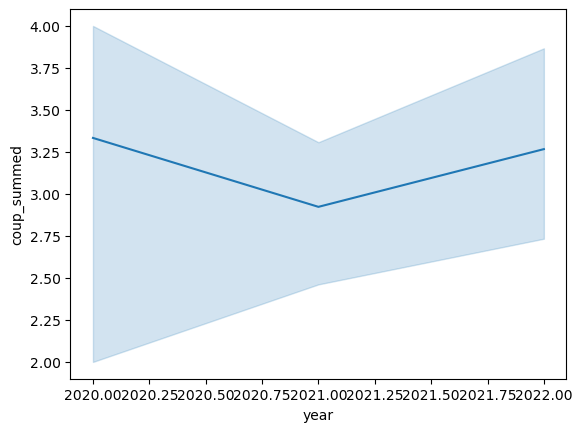

In [41]:
#simple temporal plot of coups
plot1 = sns.lineplot(data=data_coup,x='year',y='coup_summed')
plot1

In [42]:
#heatmap of coups per countries over time
heatmap = data_coup.pivot(index="iso", columns="coup_summed", values="year")
plo2 = sns.heatmap(heatmap)
plot2


ValueError: Index contains duplicate entries, cannot reshape

AttributeError: module 'matplotlib' has no attribute 'xlabel'

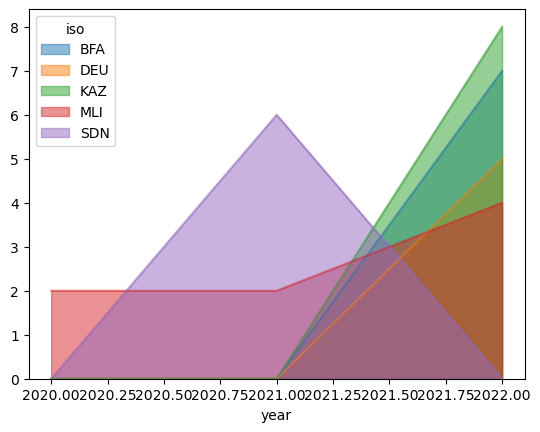

In [43]:
#top 10 countries
#time trend of the data
grouped = data_coup.groupby(['iso','year']).agg({'coup_summed': 'sum'})
top_countries = grouped.groupby('iso').agg({'coup_summed': 'sum'}).nlargest(5, 'coup_summed').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_countries)]

pivoted = filtered.reset_index().pivot(index='year', columns='iso', values='coup_summed')
pivoted.plot.area(stacked=False)
plt.xlabel('Year')
plt.ylabel('number of coups')
plt.savefig('timetrend_coups.png')
# Show the plot
plt.show()

In [44]:
#describe and plot the data
#get descriptives and plot the data
print(data_coup.describe())

          cowcode         year      month       date  coup_unrealized_count  \
count   31.000000    31.000000  31.000000  31.000000              31.000000   
mean   475.258065  2021.387097   5.709677  14.258065               0.645161   
std    204.613126     0.667204   4.009934   9.577640               0.486373   
min      2.000000  2020.000000   1.000000   1.000000               0.000000   
25%    403.500000  2021.000000   2.000000   6.000000               0.000000   
50%    439.000000  2021.000000   5.000000  11.000000               1.000000   
75%    644.000000  2022.000000   9.000000  24.000000               1.000000   
max    780.000000  2022.000000  12.000000  31.000000               1.000000   

       coup_realized_count  coup_conspira_count  coup_attempt_count  \
count            31.000000            31.000000           31.000000   
mean              0.354839             0.290323            0.354839   
std               0.486373             0.461414            0.486373   
min 

In [ ]:
#save as csv
data_coup.to_csv("coup_data.csv")

**4. ACLED**

https://api.acleddata.com/acled/read/?key=Sjnx0W7eyUxJU3ADGwqU&email=cecilia-natalie.strom@giga-hamburg.de&year>2019&event_type=Riot&sub_event_type={'Air drone strike','Armed clash','Attack','Chemical weapon','Disrupted weapons use','Excessive force against protesters','Non-state actor overtakes territory','Protest with intervention','Remote explosive/landmine/IED','Shelling/artillery/missile attack','Suicide bomb'}'

In [ ]:
API_key = 'Sjnx0W7eyUxJU3ADGwqU'
url = 'https://api.acleddata.com/acled/read/?key=' + API_key + '&email=cecilia-natalie.strom@giga-hamburg.de&year>2019&event_type=Riot,Protest'
#page tjrough the API priving the limit as parameter
#add the event type as query parameter and then looüp over the pages

**Join all the dfs together**

In [ ]:
data_1 =
data2=
data3=
data4=
data5=
data_IV = pd.merge()